## Logistic Regression Model 

In [25]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc
df=pd.read_csv('final_lebron.csv')

In [26]:
x_feats = ['age', 'mp', 'fgp', 'threep', 'ftp', 'fta', 'team', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'plus_minus']
X = pd.get_dummies(df[x_feats], drop_first=True)
# y= df.result

X.head() 

,age,mp,fgp,threep,ftp,fta,trb,ast,stl,blk,tov,pts,game_score,plus_minus,team_MIA
0,18.303,42.0,0.600,0.0,0.333,3,6,9,4,0,2,25,24.7,-9,0
1,18.304,41.0,0.471,0.2,0.571,7,12,8,1,0,7,21,14.7,-3,0
2,18.306,39.0,0.250,0.0,1.000,2,4,6,2,0,2,8,5.0,-21,0
3,18.310,41.0,0.273,0.0,1.000,1,11,7,2,3,2,7,11.2,-3,0
4,18.312,44.0,0.444,0.5,0.857,7,5,3,0,0,7,23,9.0,-7,0


In [27]:
y= pd.get_dummies(df['result'], drop_first=True)

In [28]:
y['W'] = y['W'].astype(int)

In [29]:
X = X.fillna(value=0) #Fill null values
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [32]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Training Precision: ', precision_score(y_hat_train, y_train))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train, y_train))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Training Precision:  0.9414893617021277
Testing Precision:  0.9259259259259259



Training Recall:  0.9030612244897959
Testing Recall:  0.8838383838383839



Training Accuracy:  0.8939929328621908
Testing Accuracy:  0.8692579505300353



Training F1-Score:  0.921875
Testing F1-Score:  0.9043927648578811


In [34]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC: 0.9313857930879208


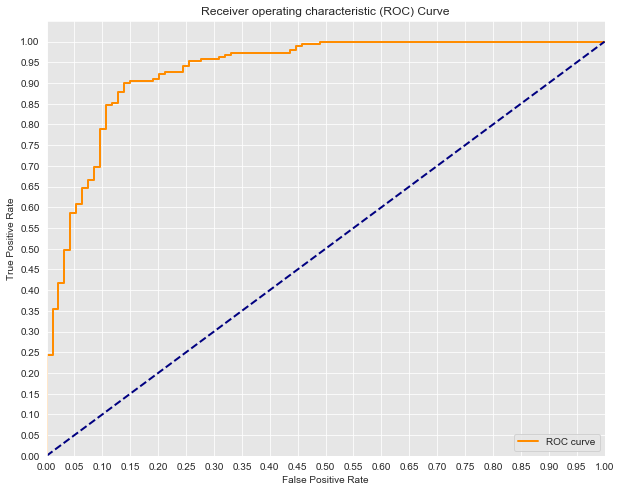

In [35]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Model 